In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Centrality Measures

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-02-26/small_trains.csv')

In [56]:
df.head()

,year,month,service,departure_station,arrival_station,journey_time_avg,total_num_trips,avg_delay_all_departing,avg_delay_all_arriving,num_late_at_departure,num_arriving_late,delay_cause,delayed_number
0,2017,9,National,PARIS EST,METZ,85.133779,299,0.752007,0.419844,15,17.0,delay_cause_external_cause,0.250000
1,2017,9,National,REIMS,PARIS EST,47.064516,218,1.263518,1.137558,10,23.0,delay_cause_external_cause,0.250000
2,2017,9,National,PARIS EST,STRASBOURG,116.234940,333,1.139257,1.586396,20,19.0,delay_cause_external_cause,0.214286
3,2017,9,National,PARIS LYON,AVIGNON TGV,161.089583,481,1.406215,4.788542,36,61.0,delay_cause_external_cause,0.155172
4,2017,9,National,PARIS LYON,BELLEGARDE (AIN),164.452632,190,1.728947,6.008860,16,38.0,delay_cause_external_cause,0.166667


In [57]:
df.shape

(32772, 13)

In [58]:
data = df[['departure_station','arrival_station']]
data

,departure_station,arrival_station
0,PARIS EST,METZ
1,REIMS,PARIS EST
2,PARIS EST,STRASBOURG
3,PARIS LYON,AVIGNON TGV
4,PARIS LYON,BELLEGARDE (AIN)
...,...,...
32767,ANGOULEME,PARIS MONTPARNASSE
32768,TOULOUSE MATABIAU,PARIS MONTPARNASSE
32769,PARIS MONTPARNASSE,TOURS
32770,PARIS MONTPARNASSE,LAVAL


In [59]:
import networkx as nx

In [60]:
data.head()

,departure_station,arrival_station
0,PARIS EST,METZ
1,REIMS,PARIS EST
2,PARIS EST,STRASBOURG
3,PARIS LYON,AVIGNON TGV
4,PARIS LYON,BELLEGARDE (AIN)


In [61]:
data['distance'] = np.random.randint(1, 100, size=data.shape[0])

c:\programas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
data

,departure_station,arrival_station,distance
0,PARIS EST,METZ,80
1,REIMS,PARIS EST,74
2,PARIS EST,STRASBOURG,60
3,PARIS LYON,AVIGNON TGV,6
4,PARIS LYON,BELLEGARDE (AIN),25
...,...,...,...
32767,ANGOULEME,PARIS MONTPARNASSE,10
32768,TOULOUSE MATABIAU,PARIS MONTPARNASSE,54
32769,PARIS MONTPARNASSE,TOURS,47
32770,PARIS MONTPARNASSE,LAVAL,8


In [ ]:
nx.from_pandas_edgelist

In [63]:
G = nx.from_pandas_edgelist(data, 'departure_station', 'arrival_station', edge_attr='distance')

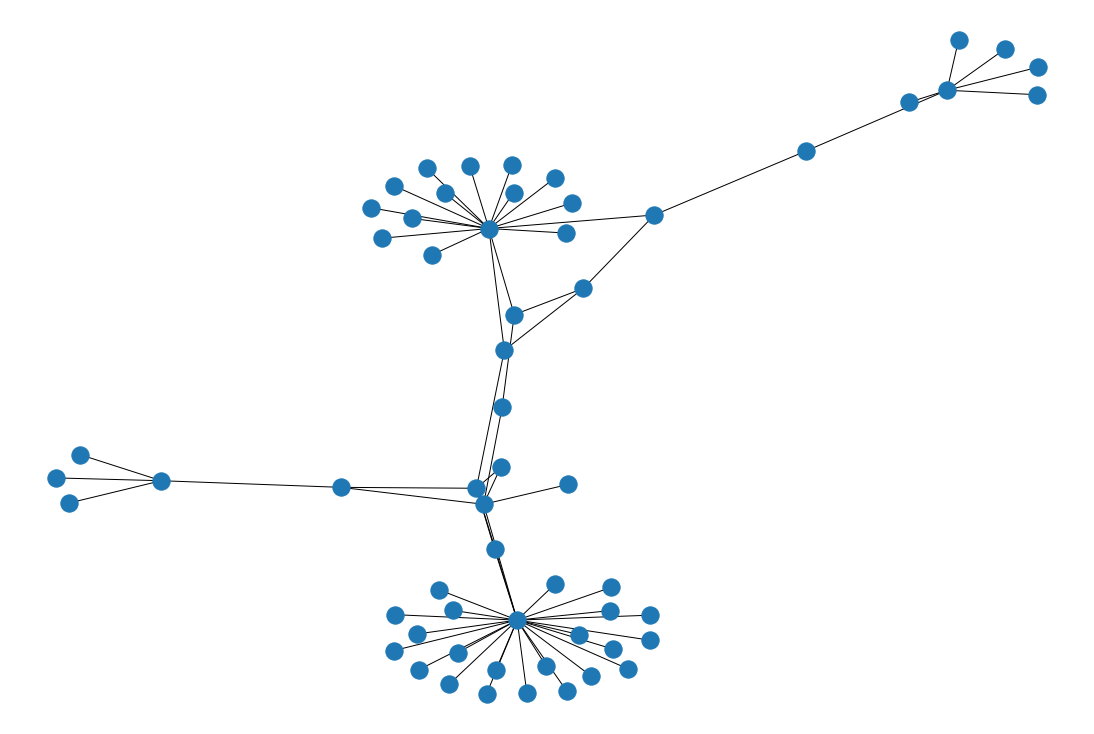

In [69]:
plt.figure(figsize=(15,10))

nx.draw(G)

In [76]:
sorted(dict(G.degree).items(), key=lambda x : x[1], reverse=True)

[('PARIS LYON', 25),
 ('PARIS MONTPARNASSE', 16),
 ('PARIS EST', 6),
 ('LYON PART DIEU', 6),
 ('MARSEILLE ST CHARLES', 6),
 ('PARIS NORD', 4),
 ('BORDEAUX ST JEAN', 3),
 ('RENNES', 3),
 ('LILLE', 3),
 ('NANTES', 3),
 ('PARIS VAUGIRARD', 3),
 ('STRASBOURG', 2),
 ('MONTPELLIER', 2),
 ('TOURCOING', 2),
 ('MARNE LA VALLEE', 2),
 ('METZ', 1),
 ('REIMS', 1),
 ('AVIGNON TGV', 1),
 ('BELLEGARDE (AIN)', 1),
 ('BESANCON FRANCHE COMTE TGV', 1),
 ('CHAMBERY CHALLES LES EAUX', 1),
 ('GRENOBLE', 1),
 ('MACON LOCHE', 1),
 ('MULHOUSE VILLE', 1),
 ('ANGERS SAINT LAUD', 1),
 ('LA ROCHELLE VILLE', 1),
 ('POITIERS', 1),
 ('VANNES', 1),
 ('FRANCFORT', 1),
 ('LAUSANNE', 1),
 ('DOUAI', 1),
 ('NANCY', 1),
 ('LE CREUSOT MONTCEAU MONTCHANIN', 1),
 ('NICE VILLE', 1),
 ('ZURICH', 1),
 ('DUNKERQUE', 1),
 ('PERPIGNAN', 1),
 ('SAINT ETIENNE CHATEAUCREUX', 1),
 ('ST PIERRE DES CORPS', 1),
 ('VALENCE ALIXAN TGV', 1),
 ('DIJON VILLE', 1),
 ('LAVAL', 1),
 ('QUIMPER', 1),
 ('TOULOUSE MATABIAU', 1),
 ('ARRAS', 1),
 ('NIME

In [80]:
dict(G.degree()).values()

dict_values([6, 1, 1, 2, 25, 1, 1, 1, 1, 1, 6, 1, 6, 2, 1, 16, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1])

In [81]:
G.order()

59

In [82]:
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

Number of edges: 65
Average degree: 2.2033898305084745
Density: 0.03798947983635301


# Centrality Measures

## Degree

In [87]:
degree = nx.degree_centrality(G)
degree = pd.DataFrame.from_dict(degree, orient='index').reset_index()
degree.columns = ['Node', 'Degree Centrality']
degree.sort_values('Degree Centrality', ascending=False).head()

,Node,Degree Centrality
4,PARIS LYON,0.431034
15,PARIS MONTPARNASSE,0.275862
0,PARIS EST,0.103448
10,LYON PART DIEU,0.103448
12,MARSEILLE ST CHARLES,0.103448


# Betweenness Centrality

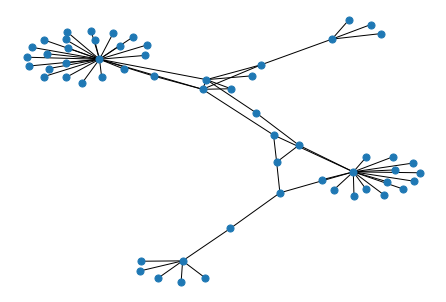

In [88]:
nx.draw(G, node_size=50)

In [96]:
G.edges['PARIS LYON','LYON PART DIEU']

{'distance': 54}

In [89]:
nx.betweenness_centrality(G)

{'PARIS EST': 0.1663641863278887,
 'METZ': 0.0,
 'REIMS': 0.0,
 'STRASBOURG': 0.18874773139745918,
 'PARIS LYON': 0.6199334543254689,
 'AVIGNON TGV': 0.0,
 'BELLEGARDE (AIN)': 0.0,
 'BESANCON FRANCHE COMTE TGV': 0.0,
 'CHAMBERY CHALLES LES EAUX': 0.0,
 'GRENOBLE': 0.0,
 'LYON PART DIEU': 0.49914297237346245,
 'MACON LOCHE': 0.0,
 'MARSEILLE ST CHARLES': 0.11474087517644686,
 'MONTPELLIER': 0.0,
 'MULHOUSE VILLE': 0.0,
 'PARIS MONTPARNASSE': 0.4890602944141964,
 'ANGERS SAINT LAUD': 0.0,
 'BORDEAUX ST JEAN': 0.03105464811453923,
 'LA ROCHELLE VILLE': 0.0,
 'POITIERS': 0.0,
 'RENNES': 0.4487799959669288,
 'VANNES': 0.0,
 'LILLE': 0.13067150635208713,
 'FRANCFORT': 0.0,
 'LAUSANNE': 0.0,
 'DOUAI': 0.0,
 'PARIS NORD': 0.10163339382940109,
 'NANCY': 0.0,
 'LE CREUSOT MONTCEAU MONTCHANIN': 0.0,
 'NICE VILLE': 0.0,
 'ZURICH': 0.0,
 'NANTES': 0.21879411171607185,
 'DUNKERQUE': 0.0,
 'PERPIGNAN': 0.0,
 'SAINT ETIENNE CHATEAUCREUX': 0.0,
 'ST PIERRE DES CORPS': 0.0,
 'VALENCE ALIXAN TGV': 0.0,
 

In [90]:
# maior betweeness é o ponto que se você remover, afeta mais o grafo 
betweenness = nx.betweenness_centrality(G)

betweenness
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

,Node,Betweenness Centrality
4,PARIS LYON,0.619933
10,LYON PART DIEU,0.499143
15,PARIS MONTPARNASSE,0.489060
20,RENNES,0.448780
31,NANTES,0.218794


# Pagerank

Pagerank mede a relevância de um nó baseado não só em quantos vizinhos ele tem, mas também medindo quantos vizinhos importantes ele tem

In [97]:
pagerank = nx.pagerank(G)

pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'PageRank Centrality']
pagerank.sort_values('PageRank Centrality', ascending=False).head()

,Node,PageRank Centrality
4,PARIS LYON,0.182676
15,PARIS MONTPARNASSE,0.115534
0,PARIS EST,0.050158
12,MARSEILLE ST CHARLES,0.037562
10,LYON PART DIEU,0.036688


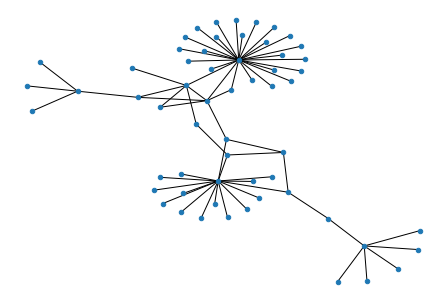

In [99]:
nx.draw_kamada_kawai(G, node_size=20,)

# Ego graph

In [100]:
nx.ego_graph(G, 'PARIS LYON', radius=1)

[('PARIS EST', 0.8333333333333333),
 ('STRASBOURG', 0.5),
 ('NANTES', 0.41666666666666663),
 ('FRANCFORT', 0.0),
 ('NANCY', 0.0),
 ('PARIS VAUGIRARD', 0.0),
 ('PARIS MONTPARNASSE', 0.0),
 ('METZ', 0.0),
 ('STUTTGART', 0.0),
 ('REIMS', 0.0)]

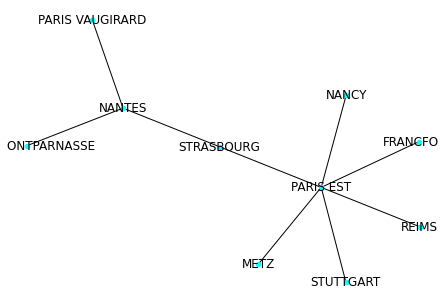

In [108]:
ego = nx.ego_graph(G, 'PARIS EST', radius=3)
nx.draw_kamada_kawai(ego, node_size=20, node_color='cyan', with_labels=True)

sorted(nx.betweenness_centrality(ego).items(), key=lambda x : x[1], reverse=True)

# Converting non-graph dataframes to edge lists

## Simpsons Network

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-08-27/simpsons-guests.csv', sep='|')

In [110]:
df.head()

,season,number,production_code,episode_title,guest_star,role
0,1,002–102,7G02,Bart the Genius,Marcia Wallace,Edna Krabappel; Ms. Melon
1,1,003–103,7G03,Homer's Odyssey,Sam McMurray,Worker
2,1,003–103,7G03,Homer's Odyssey,Marcia Wallace,Edna Krabappel
3,1,006–106,7G06,Moaning Lisa,Miriam Flynn,Ms. Barr
4,1,006–106,7G06,Moaning Lisa,Ron Taylor,Bleeding Gums Murphy


In [111]:
def df_to_graph(df, node, edge):
    ''' 
    Transform a dataframe into another dataframe suitable to work with graphs.
    '''
    
    graph_df = pd.merge(df, df, how='inner', on=edge)
    graph_df = graph_df.groupby([f'{node}_x', f'{node}_y']).count().reset_index()
    graph_df = graph_df.query(f'{node}_x != {node}_y')

    if type(edge) == list:
        graph_df = graph_df.loc[:, [node + '_x', node + '_y'] + edge]
    else:
        graph_df = graph_df.loc[:, [node + '_x', node + '_y', edge]]
    
    return graph_df.rename(columns={f'{node}_x':f'{node}_src', 
                                    f'{node}_y':f'{node}_dest',
                                    f'{edge}':f'{edge}_count'})


In [112]:
df_to_graph(df = df, node='guest_star', edge='episode_title')

,guest_star_src,guest_star_dest,episode_title_count
2,50 Cent,Dana Gould,1
4,Aaron Paul,Bryan Cranston,1
5,Aaron Paul,George Takei,1
6,Aaron Paul,Marcia Wallace,1
7,Aaron Paul,Maurice LaMarche,1
...,...,...,...
4127,Zosia Mamet,Adam Driver,1
4128,Zosia Mamet,Allison Williams,1
4129,Zosia Mamet,Jemima Kirke,1
4130,Zosia Mamet,Laura Ingraham,1


In [113]:
graph_df = df_to_graph(df, 'guest_star', 'episode_title')
graph_df.sort_values(by='episode_title_count')

,guest_star_src,guest_star_dest,episode_title_count
2,50 Cent,Dana Gould,1
2734,Michael Jackson,Kipp Lennon,1
2736,Michael Keaton,Bruce Vilanch,1
2737,Michael Keaton,Charles Napier,1
2738,Michael Keaton,Marcia Wallace,1
...,...,...,...
1602,Joe Mantegna,Marcia Wallace,8
2375,Marcia Wallace,Joe Mantegna,8
999,Frank Welker,Marcia Wallace,8
2438,Marcia Wallace,Phil Hartman,18


In [114]:
G = nx.from_pandas_edgelist(graph_df, 'guest_star_src', 'guest_star_dest')
print('Number of edges:', G.size())
print('Average degree:', sum(dict(G.degree()).values())/G.order())
print('Density:', nx.density(G))

betweenness = nx.betweenness_centrality(G, weight='edge')
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head()

Number of edges: 1669
Average degree: 4.5788751714677645
Density: 0.006289663697071105


,Node,Betweenness Centrality
5,Marcia Wallace,0.317746
6,Maurice LaMarche,0.082161
115,Jon Lovitz,0.060001
26,Phil Hartman,0.055232
46,Joe Mantegna,0.053040


In [115]:
pagerank = nx.pagerank(G, weight='edge')
pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'Pagerank Centrality']
pagerank.sort_values('Pagerank Centrality', ascending=False).head()

,Node,Pagerank Centrality
5,Marcia Wallace,0.054583
26,Phil Hartman,0.013763
6,Maurice LaMarche,0.013545
46,Joe Mantegna,0.012000
115,Jon Lovitz,0.008910


In [117]:
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, 'betweenness')

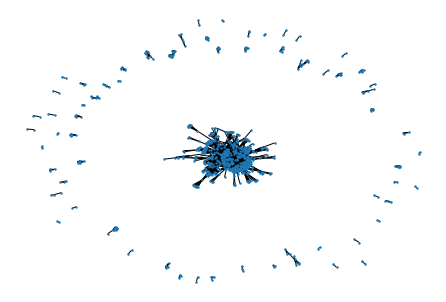

In [118]:
#d = dict(G.degree)
#d
nx.draw(G, nodelist=bb.keys(), node_size=2, edge_size=2)

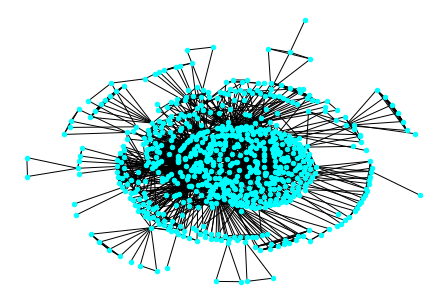

In [119]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

In [120]:
df

,season,number,production_code,episode_title,guest_star,role
0,1,002–102,7G02,Bart the Genius,Marcia Wallace,Edna Krabappel; Ms. Melon
1,1,003–103,7G03,Homer's Odyssey,Sam McMurray,Worker
2,1,003–103,7G03,Homer's Odyssey,Marcia Wallace,Edna Krabappel
3,1,006–106,7G06,Moaning Lisa,Miriam Flynn,Ms. Barr
4,1,006–106,7G06,Moaning Lisa,Ron Taylor,Bleeding Gums Murphy
...,...,...,...,...,...,...
1381,30,661–3022,YABF15,Woo-Hoo Dunnit?,Jackie Mason,Rabbi Hyman Krustofsky
1382,30,661–3022,YABF15,Woo-Hoo Dunnit?,Liev Schreiber,Dateline: Springfield Narrator
1383,30,662–3023,YABF16,Crystal Blue-Haired Persuasion,Illeana Douglas,New Age Clerk
1384,30,662–3023,YABF16,Crystal Blue-Haired Persuasion,Werner Herzog,Walter Hotenhoffer


In [121]:
len(list(G.neighbors('Marcia Wallace')))

218

# Interactive Visualization

In [30]:
# !pip install pyvis

In [122]:
graph_df.head()

,guest_star_src,guest_star_dest,episode_title_count
2,50 Cent,Dana Gould,1
4,Aaron Paul,Bryan Cranston,1
5,Aaron Paul,George Takei,1
6,Aaron Paul,Marcia Wallace,1
7,Aaron Paul,Maurice LaMarche,1


In [124]:
G

In [126]:
from pyvis.network import Network

In [127]:
g = Network(notebook=True)

In [128]:
G.nodes()

NodeView(('50 Cent', 'Dana Gould', 'Aaron Paul', 'Bryan Cranston', 'George Takei', 'Marcia Wallace', 'Maurice LaMarche', 'Wanda Sykes', 'Adam Driver', 'Allison Williams', 'Jemima Kirke', 'Laura Ingraham', 'Lena Dunham', 'Zosia Mamet', 'Adam Savage', 'Jamie Hyneman', 'Michael Cera', 'Adam Silver', 'Brian Posehn', 'Rob Riggle', 'Vanessa Bayer', 'Adam West', 'Baha Men', 'Burt Ward', 'Jan Hooks', 'Linda Ronstadt', 'Phil Hartman', 'Aerosmith', 'Kipp Lennon', 'Al Roker', 'Anne Hathaway', 'Don Pardo', 'Ken Burns', 'Kevin Michael Richardson', 'Natalie Portman', 'Sarah Michelle Gellar', 'Sarah Silverman', 'Zooey Deschanel', 'Alan Moore', 'Art Spiegelman', 'Daniel Clowes', 'Jack Black', 'Sang Am Lee', 'Albert Brooks', 'Green Day', 'James Brown', 'Joe Mantegna', 'Johnny Mathis', 'Philip Rosenthal', 'Sally Stevens', 'Tom Hanks', 'Alec Baldwin', 'Brian Grazer', 'Kim Basinger', 'Ron Howard', 'Alex Rocco', 'Jack Sheldon', 'Kirk Douglas', 'Suzanne Somers', 'Alex Trebek', 'Steve Carell', 'Terry W. Gree

In [129]:
g.from_nx(G)

In [130]:
g

<class 'pyvis.network.Network'> |N|=729 |E|=1,669

In [132]:

g.show_buttons()
g.show('test.html', )

# Game of Thrones Graph

In [138]:
url = 'https://www.macalester.edu/~abeverid/data/stormofswords.csv'
got_data = pd.read_csv(url)
G = nx.from_pandas_edgelist(got_data, 'Source','Target', edge_attr='Weight')

In [147]:
pagerank = nx.pagerank(G, weight='edge')
pagerank = pd.DataFrame.from_dict(pagerank, orient='index').reset_index()
pagerank.columns = ['Node', 'Pagerank Centrality']
pagerank.sort_values('Pagerank Centrality', ascending=False).head(10)

,Node,Pagerank Centrality
6,Tyrion,0.042878
21,Jon,0.035831
48,Robb,0.030166
50,Sansa,0.030004
63,Daenerys,0.028835
4,Jaime,0.028724
7,Tywin,0.025695
5,Robert,0.022293
17,Cersei,0.022283
12,Arya,0.022046


In [148]:
degree = nx.degree_centrality(G)
degree = pd.DataFrame.from_dict(degree, orient='index').reset_index()
degree.columns = ['Node', 'Degree Centrality']
degree.sort_values('Degree Centrality', ascending=False).head(10)

,Node,Degree Centrality
6,Tyrion,0.339623
21,Jon,0.245283
50,Sansa,0.245283
48,Robb,0.235849
4,Jaime,0.226415
7,Tywin,0.207547
17,Cersei,0.188679
12,Arya,0.179245
42,Catelyn,0.169811
5,Robert,0.169811


In [151]:
betweenness = nx.betweenness_centrality(G)
betweenness = pd.DataFrame.from_dict(betweenness, orient='index').reset_index()
betweenness.columns = ['Node', 'Betweenness Centrality']
betweenness.sort_values('Betweenness Centrality', ascending=False).head(10)

,Node,Betweenness Centrality
21,Jon,0.229965
5,Robert,0.209452
6,Tyrion,0.197913
63,Daenerys,0.157203
48,Robb,0.126964
50,Sansa,0.126720
51,Stannis,0.102700
4,Jaime,0.099943
12,Arya,0.079607
7,Tywin,0.065538


In [134]:
from pyvis.network import Network
import pandas as pd
url = 'https://www.macalester.edu/~abeverid/data/stormofswords.csv'
# https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv


got_net = Network(height="750px", width="100%", notebook=True)

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv(url)

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

# run through each edge and assign a value
for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

# get neighbors
neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

got_net.show_buttons()
got_net.show("gameofthrones.html", )

In [266]:
got_net.save_graph('got.html')

In [ ]:
# https://pyvis.readthedocs.io/en/latest/tutorial.html#visualization